In [1]:
%reset -f

In [2]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [3]:
import os
import pathlib as pl
from pprint import pformat
import flopy
import git
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from flopy.plot.styles import styles
from modflow_devtools.misc import get_env, timed
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [4]:
# Read control file
filename = "pr2-input-base.txt"
# Read the file
afile = open(filename,"r")  # connect and read file for base input
lines = []
for line in afile:
    lines.append(line.rstrip('\n'))
afile.close()
# Assign Properties
length_units= lines[0]
time_units= lines[1]
nlay = int(lines[2])  # Number of layers
nrow = int(lines[3])  # Number of rows
ncol = int(lines[4])  # Number of columns
delr = float(lines[5])  # Column width ($m$)
delc = float(lines[6])  # Row width ($m$)
delz = float(lines[7])  # Layer thickness ($m$)
top  = float(lines[8])  # Top of the model ($m$)

#

# more above

In [5]:
# Read hydraulic conductivity array
filename = "pr2-input-hydcond.txt"
hk = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        hk.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
hk = np.array(hk)

In [6]:
# Read boundary array
filename = "pr2-input-ibound.txt"
ibound = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ibound.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ibound = np.array(ibound)

In [7]:
# Read idomain array
filename = "pr2-input-idomain.txt"
idomain = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        idomain.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
idomain = np.array(idomain)

In [8]:
# Read storativity array
filename = "pr2-input-storage.txt"
ss_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ss_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ss_array = np.array(ss_array)

In [9]:
# Read porosity array
filename = "pr2-input-porosity.txt"
pors_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        pors_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
pors_array = np.array(pors_array)

In [10]:
# Read longitudinal dispersivity array
filename = "pr2-input-disperl.txt"
displ_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        displ_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
displ_array = np.array(displ_array)

In [11]:
# Read dispersivity in y-direction array
filename = "pr2-input-dispert.txt"
dispt_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        dispt_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
dispt_array = np.array(dispt_array)

In [12]:
# Read initial heads array
filename = "pr2-input-headinit.txt"
strt = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        strt.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
strt = np.array(strt)

strt

array([[9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 ,
        9999.99 , 9999.99 , 9999.99 , 9999.99 ],
       [9999.99 ,  600.   ,  600.   ,  600.   ,  600.   ,  600.   ,
         600.   ,  600.   ,  600.   , 9999.99 ],
       [9999.99 ,  598.627,  598.635,  598.651,  598.671,  598.685,
         598.696,  598.698,  598.699, 9999.99 ],
       [9999.99 ,  597.244,  597.263,  597.299,  597.347,  597.373,
         597.4  ,  597.399,  597.398, 9999.99 ],
       [9999.99 ,  595.844,  595.873,  595.935,  596.046,  596.058,
         596.134,  596.1  ,  596.095, 9999.99 ],
       [9999.99 ,  592.981,  593.023,  593.102,  593.21 ,  593.295,
         593.388,  593.439,  593.477, 9999.99 ],
       [9999.99 ,  588.644,  588.707,  588.823,  588.976,  589.14 ,
         589.307,  589.46 ,  589.587, 9999.99 ],
       [9999.99 ,  584.245,  584.338,  584.507,  584.73 ,  584.981,
         585.242,  585.506,  585.823, 9999.99 ],
       [9999.99 ,  579.753,  579.891,  580.139,  580.457,  580.8

In [13]:
0.01548

0.01548

In [14]:
# Wellfield Conditions
# MF2K5 pumping/injection rates in length-time units
# CFS pumping is negative
qW1 = -16.0 
qW2 =  -7.0
qW3 =  -7.0
# CFS injection is positive
qI1 = 0.0 
qI2 = 0.0
qI3 = 30.0
# Concentrations 
# PPM pumping (set pumpings to zero value)
cW1 = 0.0
cW2 = 0.0
cW3 = 0.0
# PPM injection
cI1 = 00.0
cI2 = 00.0
cI3 = 1000.0
#spd = {
 #   0: [[0, 3, 6, cwell1, 2], [0, 10, 6, cwell0, 2]],
  #  1: [[0, 3, 6, cwell0, 2], [0, 10, 6, cwell0, 2]],
#}  # Well info 4 MT3D
# Build MF6 wellfield objects
wellist_sp1 = []
#                   (k,  i, j),   flow,  conc
wellist_sp1.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp1.append([(0, 4, 6), qI1, cI2])  # Injection well
wellist_sp1.append([(0, 7, 8), qI1, cI3])  # Injection well #3  ACTIVE THIS SCENARIO
wellist_sp1.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp1.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp1.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
wellist_sp2 = []
#                   (k,  i, j),   flow,  conc
wellist_sp2.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp2.append([(0, 4, 6), qI2, cI2])  # Injection well
wellist_sp2.append([(0, 7, 8), qI3, cI3])  # Injection well  #3  ACTIVE THIS SCENARIO
wellist_sp2.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp2.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
spd_mf6 = {0: wellist_sp1, 1: wellist_sp2}

In [15]:
# Model units
#length_units = "meters"
#time_units = "seconds"

# Model parameters
#nlay = 1  # Number of layers
#nrow = 18  # Number of rows
#ncol = 14  # Number of columns
#delr = 100.0  # Column width ($m$)
#delc = 100.0  # Row width ($m$)
#delz = 10.0  # Layer thickness ($m$)
#top = 0.0  # Top of the model ($m$)
#prsity = 0.3  # Porosity - array reader above
k1 = 1.474e-4  # Horiz. hyd. conductivity of medium grain material ($m/sec$)
k2 = 1.474e-7  # Horiz. hyd. conductivity of fine grain material ($m/sec$)
inj = 0.001  # Injection well rate ($m^3/sec$)
ext = -0.0189  # Extraction well pumping rate ($m^3/sec$)
al = 20.0  # Longitudinal dispersivity ($m$)
trpt = 0.2  # Ratio of horiz. transverse to longitudinal dispersivity ($m$)
perlen = 2.0  # Simulation time ($years$)

# Additional model input
#hk = k1 * np.ones((nlay, nrow, ncol), dtype=float)
#hk[:, 5:8, 1:8] = k2
laytyp = icelltype = 0

# Active model domain
#ibound = np.ones((nlay, nrow, ncol), dtype=int)
#ibound[0, 0, :] = -1
#ibound[0, -1, :] = -1
#idomain = np.ones((nlay, nrow, ncol), dtype=int)
icbund = 1

# Boundary conditions

# Transport related
sconc = 0.0
ath1 = al * trpt
dmcoef = 0.0  # m^2/s
# Time variables
perlen = [365.0 * 86400, 365.0 * 86400]
steady = [False, False]
nper = len(perlen)
nstp = [365, 365]
tsmult = [1.0, 1.0]
#
sconc = 0.0
c0 = 0.0
botm = [top - delz]
mixelm = -1

# Solver settings
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0
percel = 1.0  # HMOC parameters
itrack = 2
wd = 0.5
dceps = 1.0e-5
nplane = 0
npl = 0
nph = 16
npmin = 2
npmax = 32
dchmoc = 1.0e-3
nlsink = nplane
npsink = nph
nadvfd = 1

In [16]:
# Workspace and Executibles
#binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
#workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6-pr2" # location on MY computer to store files this example (directory must already exist)
#workarea = workspace # location on MY computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-5364-webroot/mfexperiments/mf6-pr2" # location on MY computer to store files this example (directory must already exist)


# Set Simulation Name(s)
name = "mf6-pr2"
gwfname = "gwf-" + name
gwtname = "gwt-" + name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name="sim-" + name, exe_name=binary, version="mf6", sim_ws=workarea
)
####### CREATED "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mt3d_example9"

In [17]:
####### Instantiating MODFLOW 6 time discretization ########
tdis_rc = []
for i in range(nper):
    tdis_rc.append((perlen[i], nstp[i], tsmult[i]))
flopy.mf6.ModflowTdis(sim, nper=nper, perioddata=tdis_rc, time_units=time_units);
## delete ";" in above line at end to show full output

In [18]:
####### Instantiating MODFLOW 6 groundwater flow model ########
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(gwfname)
# create MODFLOW6 flow model framework
gwf = flopy.mf6.ModflowGwf(sim, modelname=gwfname, save_flows=True, model_nam_file=model_nam_file);
## delete ";" in above line at end to show full output

In [19]:
###### Instantiating MODFLOW 6 solver for flow model #######
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html
imsgwf = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="CG",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwfname}.ims",
    )
sim.register_ims_package(imsgwf, [gwf.name]);
## delete ";" in above line at end to show full output

In [20]:
###### Instantiating MODFLOW 6 discretization package ######
flopy.mf6.ModflowGwfdis(
    gwf,
    length_units=length_units,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwfname}.dis",
    );
## delete ";" in above line at end to show full output

In [21]:
# Build MF6 constant head boundaries:
xc = gwf.modelgrid.xcellcenters
chdspd = []
# Loop through the top & bottom sides.
for j in range(1,ncol-1):
#for j in np.arange(ncol):
#               l,  r, c,  head, conc
    chdspd.append([(0, 1, j), 600.0, 0.0])  # Top boundary
    hd = 520.0 + (xc[-1, j] - xc[-1, 1]) * 2.8572 / 1500
    chdspd.append([(0, 12, j), round(hd,1), 0.0])  # Bottom boundary
chdspd = {0: chdspd}

In [22]:
###### Instantiating MODFLOW 6 initial conditions package for flow model #######
flopy.mf6.ModflowGwfic(gwf, strt=strt, filename=f"{gwfname}.ic");
## delete ";" in above line at end to show full output

In [23]:
# Instantiating MODFLOW 6 node-property flow package
flopy.mf6.ModflowGwfnpf(
    gwf,
    save_flows=False,
    icelltype=icelltype,
    k=hk,
    k33=hk,
    save_specific_discharge=True,
    filename=f"{gwfname}.npf",
    );
## delete ";" in above line at end to show full output

In [24]:
# Define the Storage package (sto) with the ss array
#sto = flopy.mf6.ModflowGwfsto(gwf, ss=1.0e-05)
sto = flopy.mf6.ModflowGwfsto(gwf, ss=ss_array);
## delete ";" in above line at end to show full output

In [25]:
# Instantiating MODFLOW 6 constant head package

flopy.mf6.ModflowGwfchd(
    gwf,
    maxbound=len(chdspd),
    stress_period_data=chdspd,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="CHD-1",
    filename=f"{gwfname}.chd",
    );
## delete ";" in above line at end to show full output

In [26]:
# Instantiate the wel package
flopy.mf6.ModflowGwfwel(
    gwf,
    print_input=True,
    print_flows=True,
    stress_period_data=spd_mf6,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="WEL-1",
    filename=f"{gwfname}.wel",
    );
## delete ";" in above line at end to show full output

In [27]:
# Instantiating MODFLOW 6 output control package for flow model
flopy.mf6.ModflowGwfoc(
    gwf,
    head_filerecord=f"{gwfname}.hds",
    budget_filerecord=f"{gwfname}.bud",
    headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    );
## delete ";" in above line at end to show full output

In [28]:
###### Instantiating MODFLOW 6 groundwater transport package ##########
gwtname = "gwt-" + name
gwt = flopy.mf6.MFModel(
    sim,
    model_type="gwt6",
    modelname=gwtname,
    model_nam_file=f"{gwtname}.nam",
    )#;
## delete ";" in above line at end to show full output
gwt.name_file.save_flows = True

In [29]:
# create iterative model solution and register the gwt model with it
imsgwt = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="BICGSTAB",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwtname}.ims",
    )
sim.register_ims_package(imsgwt, [gwt.name]);
## delete ";" in above line at end to show full output

In [30]:
###### Instantiating MODFLOW 6 transport discretization package #####
flopy.mf6.ModflowGwtdis(
    gwt,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwtname}.dis",
    );
## delete ";" in above line at end to show full output

In [31]:
# Instantiating MODFLOW 6 transport initial concentrations
flopy.mf6.ModflowGwtic(gwt, strt=sconc, filename=f"{gwtname}.ic");
## delete ";" in above line at end to show full output

In [32]:
# Instantiating MODFLOW 6 transport advection package
if mixelm >= 0:
    scheme = "UPSTREAM"
elif mixelm == -1:
    scheme = "TVD"
else:
    raise Exception()
flopy.mf6.ModflowGwtadv(gwt, scheme=scheme, filename=f"{gwtname}.adv");
## delete ";" in above line at end to show full output

In [33]:
# Instantiating MODFLOW 6 transport dispersion package
if al != 0:
    flopy.mf6.ModflowGwtdsp(
        gwt,
        #alh=al, # longitudinal
        alh = displ_array,
        #ath1=ath1, # transverse
        ath1 = dispt_array,
        filename=f"{gwtname}.dsp",
        );
## delete ";" in above line at end to show full output

In [34]:
# Instantiating MODFLOW 6 transport mass storage package
flopy.mf6.ModflowGwtmst(
    gwt,
    porosity=pors_array,
##    porosity=prsity,
    first_order_decay=False,
    decay=None,
    decay_sorbed=None,
    sorption=None,
    bulk_density=None,
    distcoef=None,
    filename=f"{gwtname}.mst",
    );
## delete ";" in above line at end to show full output

In [35]:
# Instantiating MODFLOW 6 transport source-sink mixing package
sourcerecarray = [
    ("WEL-1", "AUX", "CONCENTRATION"),
    ("CHD-1", "AUX", "CONCENTRATION"),
    ]
flopy.mf6.ModflowGwtssm(
    gwt,
    sources=sourcerecarray,
    print_flows=True,
    filename=f"{gwtname}.ssm",
    );
## delete ";" in above line at end to show full output

In [36]:
# Instantiating MODFLOW 6 transport output control package
flopy.mf6.ModflowGwtoc(
    gwt,
    budget_filerecord=f"{gwtname}.cbc",
    concentration_filerecord=f"{gwtname}.ucn",
    concentrationprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    filename=f"{gwtname}.oc",
    );
## delete ";" in above line at end to show full output

In [37]:
# Instantiating MODFLOW 6 flow-transport exchange mechanism
flopy.mf6.ModflowGwfgwt(
    sim,
    exgtype="GWF6-GWT6",
    exgmnamea=gwfname,
    exgmnameb=gwtname,
    filename=f"{name}.gwfgwt",
    );
## delete ";" in above line at end to show full output

In [38]:
sim.write_simulation(silent=True)

In [39]:
#success, buff = sim.run_simulation(silent=False, report=True)#Verbose output
success, buff = sim.run_simulation(silent=True, report=True)#Suppress output
assert success, pformat(buff)

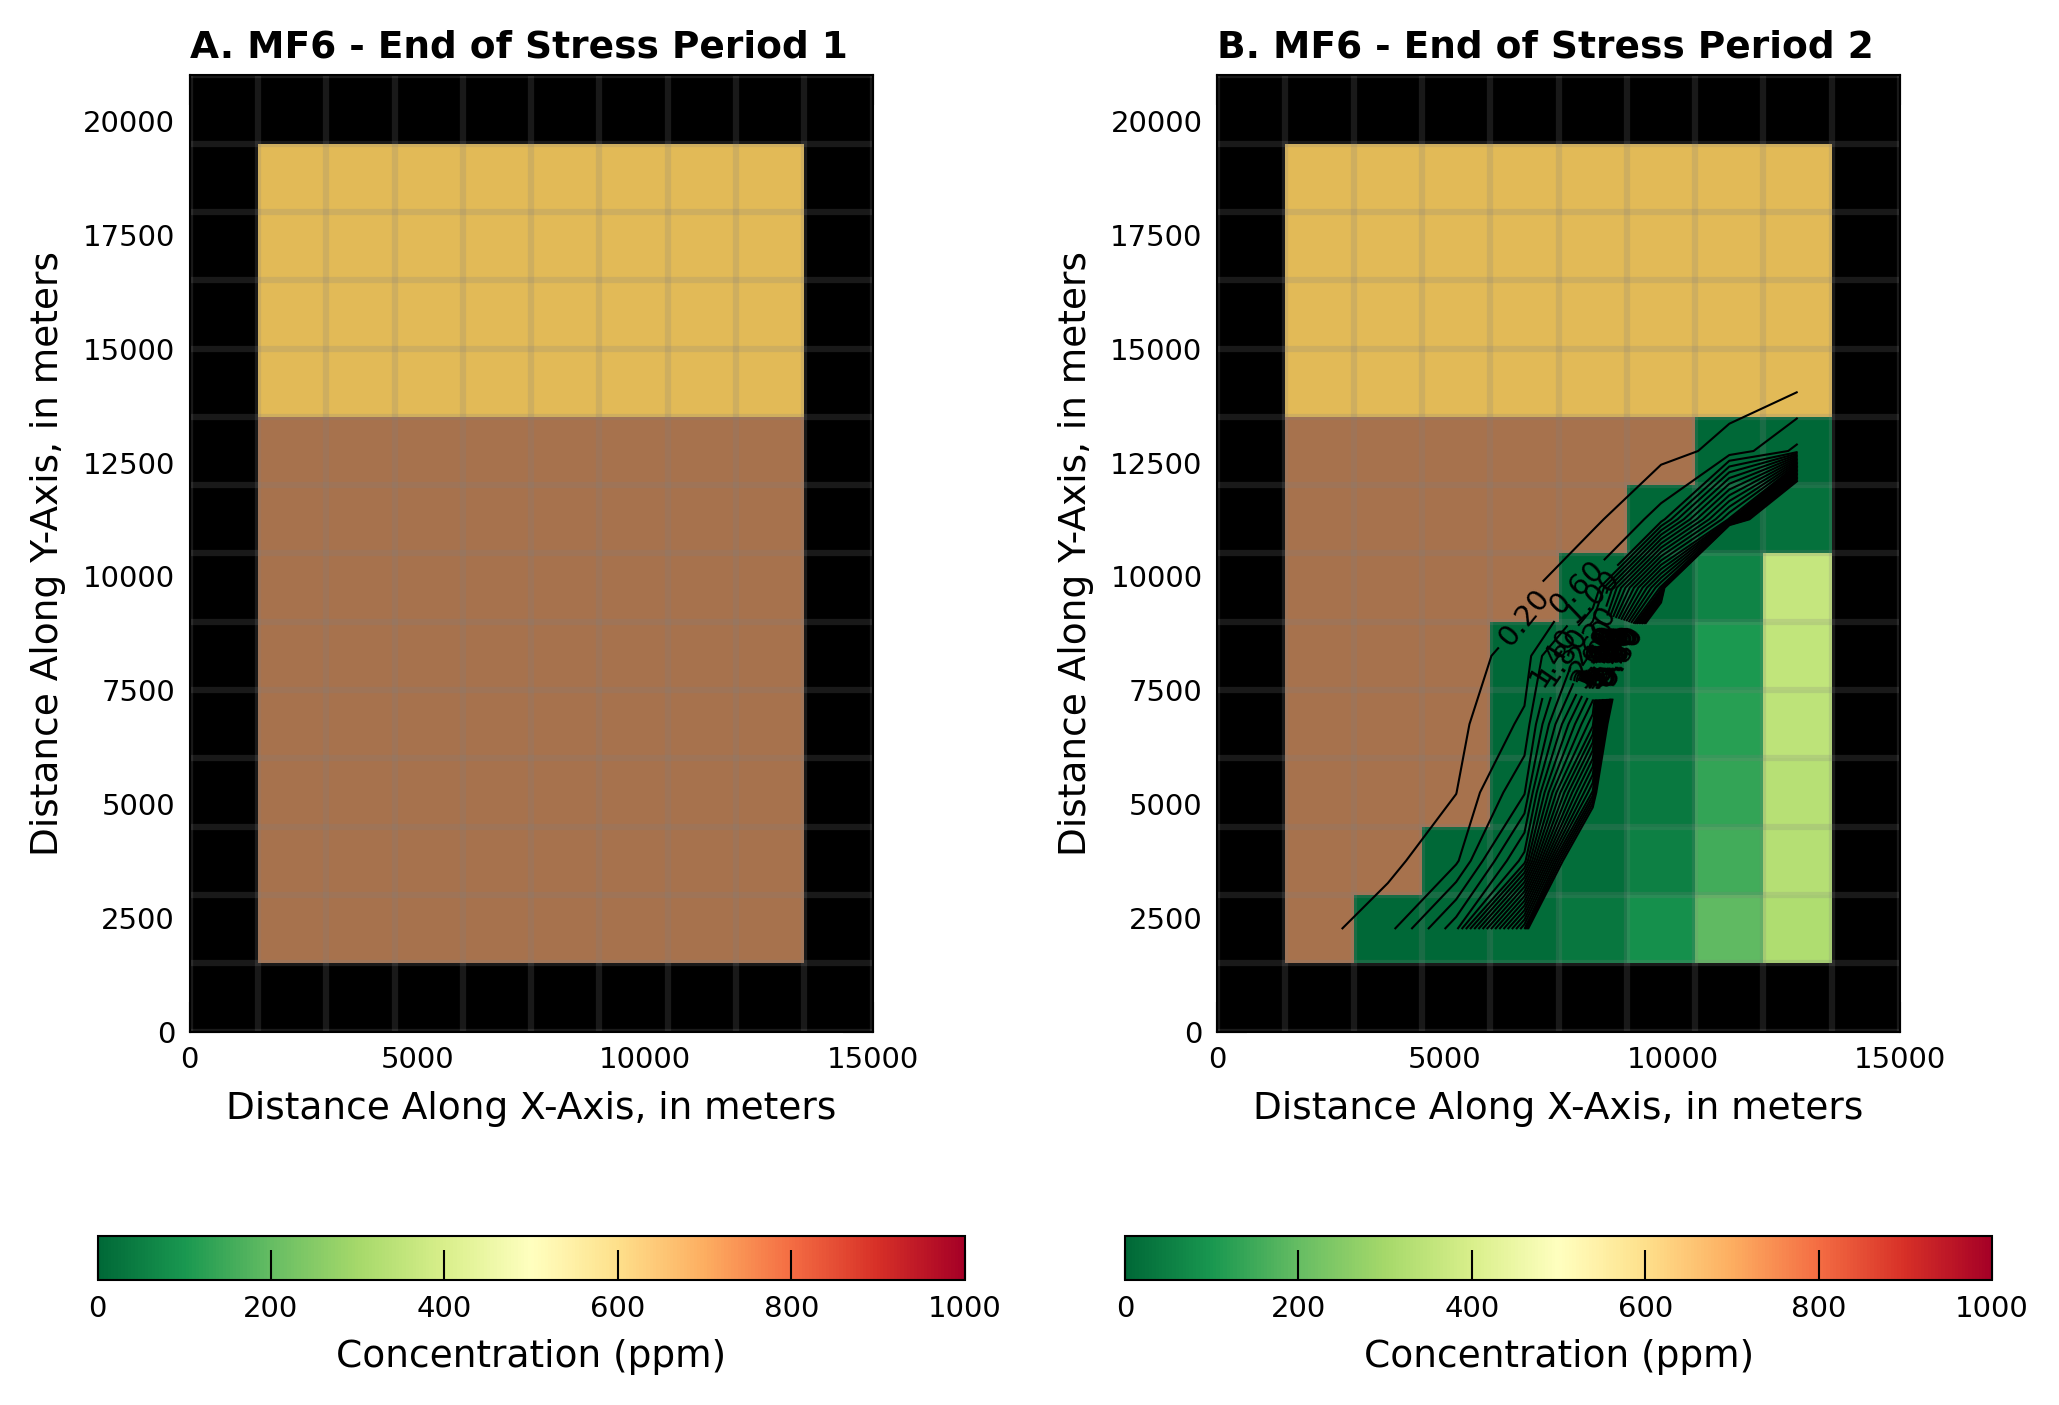

In [40]:
import copy
import matplotlib as mpl
# Figure properties
figure_size = (7, 5)
# Get the MF6 concentration output
gwt = sim.get_model(list(sim.model_names)[1])
ucnobj_mf6 = gwt.output.concentration()
conc_mf6 = ucnobj_mf6.get_alldata()


# Create figure for scenario
with styles.USGSPlot() as fs:
    sim_name = sim.name
    plt.rcParams["lines.dashed_pattern"] = [5.0, 5.0]
    levels = np.arange(0.2, 10, 0.4)
    stp_idx = 0  # 0-based (out of 2 possible stress periods)
# Plot after 8 years
    axWasNone = False
#    if ax is None:
    fig = plt.figure(figsize=figure_size, dpi=300, tight_layout=True)
    axWasNone = True
    ax = fig.add_subplot(1, 2, 1, aspect="equal")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0],  alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 0
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)
    
# second stress period
    stp_idx = 1  # 0-based (out of 2 possible stress periods)
    if axWasNone:
        ax = fig.add_subplot(1, 2, 2, aspect="equal",label = "subplot2")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0], alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 1
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)

In [41]:
print("Shape:", conc_mf6.shape)  # (rows, columns, depth, etc.)
print("Data type:", conc_mf6.dtype)
print("Number of dimensions:", conc_mf6.ndim)

Shape: (2, 1, 14, 10)
Data type: float64
Number of dimensions: 4


In [42]:
print("W1 Conc SP1",round(conc_mf6[0][0][11][5],3))
print("W1 Conc SP2",round(conc_mf6[1][0][11][5],3))
print("W2 Conc SP1",round(conc_mf6[0][0][11][7],3))
print("W2 Conc SP2",round(conc_mf6[1][0][11][7],3))
print("W3 Conc SP1",round(conc_mf6[0][0][11][8],3))
print("W3 Conc SP2",round(conc_mf6[1][0][11][8],3))

#print("I1 Conc SP1",round(conc_mf6[0][0][4][4],3))
#print("I1 Conc SP2",round(conc_mf6[1][0][4][4],3))
#print("I2 Conc SP1",round(conc_mf6[0][0][4][6],3))
#print("I2 Conc SP2",round(conc_mf6[1][0][4][6],3))
#print("I3 Conc SP1",round(conc_mf6[0][0][7][8],3))
#print("I3 Conc SP2",round(conc_mf6[1][0][7][8],3))
#$(0, 11, 5), qW1, cW1])  # Pumping well
#wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
#wellist_sp2.append([(0, 11, 8)

W1 Conc SP1 0.0
W1 Conc SP2 15.247
W2 Conc SP1 0.0
W2 Conc SP2 153.983
W3 Conc SP1 0.0
W3 Conc SP2 328.63


In [43]:
%reset -f

In [44]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [45]:
import os
import pathlib as pl
from pprint import pformat
import flopy
import git
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from flopy.plot.styles import styles
from modflow_devtools.misc import get_env, timed
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [46]:
! pwd

/home/webroot/ce-5364-webroot/ce5364jupyterbook/chapters/12.01usgsmodflow6/mf6-pr2


In [47]:
# Read control file
filename = "pr2-input-base.txt"
# Read the file
afile = open(filename,"r")  # connect and read file for base input
lines = []
for line in afile:
    lines.append(line.rstrip('\n'))
afile.close()
# Assign Properties
length_units= lines[0]
time_units= lines[1]
nlay = int(lines[2])  # Number of layers
nrow = int(lines[3])  # Number of rows
ncol = int(lines[4])  # Number of columns
delr = float(lines[5])  # Column width ($m$)
delc = float(lines[6])  # Row width ($m$)
delz = float(lines[7])  # Layer thickness ($m$)
top  = float(lines[8])  # Top of the model ($m$)

#

# more above

In [48]:
# Read hydraulic conductivity array
filename = "pr2-input-hydcond.txt"
hk = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        hk.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
hk = np.array(hk)

In [49]:
# Read boundary array
filename = "pr2-input-ibound.txt"
ibound = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ibound.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ibound = np.array(ibound)

In [50]:
# Read idomain array
filename = "pr2-input-idomain.txt"
idomain = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        idomain.append([int(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
idomain = np.array(idomain)

In [51]:
# Read storativity array
filename = "pr2-input-storage.txt"
ss_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        ss_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
ss_array = np.array(ss_array)

In [52]:
# Read porosity array
filename = "pr2-input-porosity.txt"
pors_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        pors_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
pors_array = np.array(pors_array)

In [53]:
# Read longitudinal dispersivity array
filename = "pr2-input-disperl.txt"
displ_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        displ_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
displ_array = np.array(displ_array)

In [54]:
# Read dispersivity in y-direction array
filename = "pr2-input-dispert.txt"
dispt_array = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        dispt_array.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
dispt_array = np.array(dispt_array)

In [55]:
# Read initial heads array
filename = "pr2-input-headinit.txt"
strt = []
# Read the file
afile = open(filename,"r")  # connect and read file for base input
for ilay in range(nlay):
    for line in afile:
        strt.append([float(n) for n in line.strip().split(',')])
afile.close()
# convert into numpy array
strt = np.array(strt)

strt

array([[9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 , 9999.99 ,
        9999.99 , 9999.99 , 9999.99 , 9999.99 ],
       [9999.99 ,  600.   ,  600.   ,  600.   ,  600.   ,  600.   ,
         600.   ,  600.   ,  600.   , 9999.99 ],
       [9999.99 ,  598.627,  598.635,  598.651,  598.671,  598.685,
         598.696,  598.698,  598.699, 9999.99 ],
       [9999.99 ,  597.244,  597.263,  597.299,  597.347,  597.373,
         597.4  ,  597.399,  597.398, 9999.99 ],
       [9999.99 ,  595.844,  595.873,  595.935,  596.046,  596.058,
         596.134,  596.1  ,  596.095, 9999.99 ],
       [9999.99 ,  592.981,  593.023,  593.102,  593.21 ,  593.295,
         593.388,  593.439,  593.477, 9999.99 ],
       [9999.99 ,  588.644,  588.707,  588.823,  588.976,  589.14 ,
         589.307,  589.46 ,  589.587, 9999.99 ],
       [9999.99 ,  584.245,  584.338,  584.507,  584.73 ,  584.981,
         585.242,  585.506,  585.823, 9999.99 ],
       [9999.99 ,  579.753,  579.891,  580.139,  580.457,  580.8

In [56]:
0.01548

0.01548

In [57]:
# Wellfield Conditions
# MF2K5 pumping/injection rates in length-time units
# CFS pumping is negative
qW1 = -16.0 
qW2 =  -7.0
qW3 =  -7.0
# CFS injection is positive
qI1 = 10.0 
qI2 = 0.0
qI3 = 20.0
# Concentrations 
# PPM pumping (set pumpings to zero value)
cW1 = 0.0
cW2 = 0.0
cW3 = 0.0
# PPM injection
cI1 = 1000.0
cI2 = 1000.0
cI3 = 1000.0
#spd = {
 #   0: [[0, 3, 6, cwell1, 2], [0, 10, 6, cwell0, 2]],
  #  1: [[0, 3, 6, cwell0, 2], [0, 10, 6, cwell0, 2]],
#}  # Well info 4 MT3D
# Build MF6 wellfield objects
wellist_sp1 = []
#                   (k,  i, j),   flow,  conc
wellist_sp1.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp1.append([(0, 4, 6), qI1, cI2])  # Injection well
wellist_sp1.append([(0, 7, 8), qI1, cI3])  # Injection well #3  ACTIVE THIS SCENARIO
wellist_sp1.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp1.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp1.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
wellist_sp2 = []
#                   (k,  i, j),   flow,  conc
wellist_sp2.append([(0, 4, 4), qI1, cI1])  # Injection well
wellist_sp2.append([(0, 4, 6), qI2, cI2])  # Injection well
wellist_sp2.append([(0, 7, 8), qI3, cI3])  # Injection well  #3  ACTIVE THIS SCENARIO
wellist_sp2.append([(0, 11, 5), qW1, cW1])  # Pumping well
wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
wellist_sp2.append([(0, 11, 8), qW3, cW3])  # Pumping well
#
spd_mf6 = {0: wellist_sp1, 1: wellist_sp2}

In [58]:
# Model units
#length_units = "meters"
#time_units = "seconds"

# Model parameters
#nlay = 1  # Number of layers
#nrow = 18  # Number of rows
#ncol = 14  # Number of columns
#delr = 100.0  # Column width ($m$)
#delc = 100.0  # Row width ($m$)
#delz = 10.0  # Layer thickness ($m$)
#top = 0.0  # Top of the model ($m$)
#prsity = 0.3  # Porosity - array reader above
k1 = 1.474e-4  # Horiz. hyd. conductivity of medium grain material ($m/sec$)
k2 = 1.474e-7  # Horiz. hyd. conductivity of fine grain material ($m/sec$)
inj = 0.001  # Injection well rate ($m^3/sec$)
ext = -0.0189  # Extraction well pumping rate ($m^3/sec$)
al = 20.0  # Longitudinal dispersivity ($m$)
trpt = 0.2  # Ratio of horiz. transverse to longitudinal dispersivity ($m$)
perlen = 2.0  # Simulation time ($years$)

# Additional model input
#hk = k1 * np.ones((nlay, nrow, ncol), dtype=float)
#hk[:, 5:8, 1:8] = k2
laytyp = icelltype = 0

# Active model domain
#ibound = np.ones((nlay, nrow, ncol), dtype=int)
#ibound[0, 0, :] = -1
#ibound[0, -1, :] = -1
#idomain = np.ones((nlay, nrow, ncol), dtype=int)
icbund = 1

# Boundary conditions

# Transport related
sconc = 0.0
ath1 = al * trpt
dmcoef = 0.0  # m^2/s
# Time variables
perlen = [365.0 * 86400, 365.0 * 86400]
steady = [False, False]
nper = len(perlen)
nstp = [365, 365]
tsmult = [1.0, 1.0]
#
sconc = 0.0
c0 = 0.0
botm = [top - delz]
mixelm = -1

# Solver settings
nouter, ninner = 100, 300
hclose, rclose, relax = 1e-6, 1e-6, 1.0
percel = 1.0  # HMOC parameters
itrack = 2
wd = 0.5
dceps = 1.0e-5
nplane = 0
npl = 0
nph = 16
npmin = 2
npmax = 32
dchmoc = 1.0e-3
nlsink = nplane
npsink = nph
nadvfd = 1

In [59]:
# Workspace and Executibles
binary = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6"  # location on MY computer of the compiled modflow program
workarea = "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mf6-pr2" # location on MY computer to store files this example (directory must already exist)
#workarea = workspace # location on MY computer to store files this example (directory must already exist)

binary = "/home/sensei/mfplayground/modflow-python/mf6.4.1_linux/bin/mf6"  # location on AWS computer of the compiled modflow program
workarea = "/home/sensei/ce-5364-webroot/mfexperiments/mf6-pr2" # location on MY computer to store files this example (directory must already exist)



# Set Simulation Name(s)
name = "mf6-pr2"
gwfname = "gwf-" + name
gwtname = "gwt-" + name

##### FLOPY Build simulation framework ####
sim = flopy.mf6.MFSimulation(
    sim_name="sim-" + name, exe_name=binary, version="mf6", sim_ws=workarea
)
####### CREATED "/home/sensei/ce-4363-webroot/ModflowExperimental/mf6-arm/mt3d_example9"

In [60]:
####### Instantiating MODFLOW 6 time discretization ########
tdis_rc = []
for i in range(nper):
    tdis_rc.append((perlen[i], nstp[i], tsmult[i]))
flopy.mf6.ModflowTdis(sim, nper=nper, perioddata=tdis_rc, time_units=time_units);
## delete ";" in above line at end to show full output

In [61]:
####### Instantiating MODFLOW 6 groundwater flow model ########
# Set Model Name (using same base name as the simulation)
model_nam_file = "{}.nam".format(gwfname)
# create MODFLOW6 flow model framework
gwf = flopy.mf6.ModflowGwf(sim, modelname=gwfname, save_flows=True, model_nam_file=model_nam_file);
## delete ";" in above line at end to show full output

In [62]:
###### Instantiating MODFLOW 6 solver for flow model #######
# Set Iterative Model Solution (choose solver parameters)
# about IMS see: https://water.usgs.gov/nrp/gwsoftware/ModelMuse/Help/sms_sparse_matrix_solution_pac.htm
# using defaults see: https://flopy.readthedocs.io/en/3.3.2/source/flopy.mf6.modflow.mfims.html
imsgwf = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="CG",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwfname}.ims",
    )
sim.register_ims_package(imsgwf, [gwf.name]);
## delete ";" in above line at end to show full output

In [63]:
###### Instantiating MODFLOW 6 discretization package ######
flopy.mf6.ModflowGwfdis(
    gwf,
    length_units=length_units,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwfname}.dis",
    );
## delete ";" in above line at end to show full output

In [64]:
# Build MF6 constant head boundaries:
xc = gwf.modelgrid.xcellcenters
chdspd = []
# Loop through the top & bottom sides.
for j in range(1,ncol-1):
#for j in np.arange(ncol):
#               l,  r, c,  head, conc
    chdspd.append([(0, 1, j), 600.0, 0.0])  # Top boundary
    hd = 520.0 + (xc[-1, j] - xc[-1, 1]) * 2.8572 / 1500
    chdspd.append([(0, 12, j), round(hd,1), 0.0])  # Bottom boundary
chdspd = {0: chdspd}

In [65]:
###### Instantiating MODFLOW 6 initial conditions package for flow model #######
flopy.mf6.ModflowGwfic(gwf, strt=strt, filename=f"{gwfname}.ic");
## delete ";" in above line at end to show full output

In [66]:
# Instantiating MODFLOW 6 node-property flow package
flopy.mf6.ModflowGwfnpf(
    gwf,
    save_flows=False,
    icelltype=icelltype,
    k=hk,
    k33=hk,
    save_specific_discharge=True,
    filename=f"{gwfname}.npf",
    );
## delete ";" in above line at end to show full output

In [67]:
# Define the Storage package (sto) with the ss array
#sto = flopy.mf6.ModflowGwfsto(gwf, ss=1.0e-05)
sto = flopy.mf6.ModflowGwfsto(gwf, ss=ss_array);
## delete ";" in above line at end to show full output

In [68]:
# Instantiating MODFLOW 6 constant head package

flopy.mf6.ModflowGwfchd(
    gwf,
    maxbound=len(chdspd),
    stress_period_data=chdspd,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="CHD-1",
    filename=f"{gwfname}.chd",
    );
## delete ";" in above line at end to show full output

In [69]:
# Instantiate the wel package
flopy.mf6.ModflowGwfwel(
    gwf,
    print_input=True,
    print_flows=True,
    stress_period_data=spd_mf6,
    save_flows=False,
    auxiliary="CONCENTRATION",
    pname="WEL-1",
    filename=f"{gwfname}.wel",
    );
## delete ";" in above line at end to show full output

In [70]:
# Instantiating MODFLOW 6 output control package for flow model
flopy.mf6.ModflowGwfoc(
    gwf,
    head_filerecord=f"{gwfname}.hds",
    budget_filerecord=f"{gwfname}.bud",
    headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("HEAD", "LAST"), ("BUDGET", "LAST")],
    );
## delete ";" in above line at end to show full output

In [71]:
###### Instantiating MODFLOW 6 groundwater transport package ##########
gwtname = "gwt-" + name
gwt = flopy.mf6.MFModel(
    sim,
    model_type="gwt6",
    modelname=gwtname,
    model_nam_file=f"{gwtname}.nam",
    )#;
## delete ";" in above line at end to show full output
gwt.name_file.save_flows = True

In [72]:
# create iterative model solution and register the gwt model with it
imsgwt = flopy.mf6.ModflowIms(
    sim,
    print_option="SUMMARY",
    outer_dvclose=hclose,
    outer_maximum=nouter,
    under_relaxation="NONE",
    inner_maximum=ninner,
    inner_dvclose=hclose,
    rcloserecord=rclose,
    linear_acceleration="BICGSTAB",
    scaling_method="NONE",
    reordering_method="NONE",
    relaxation_factor=relax,
    filename=f"{gwtname}.ims",
    )
sim.register_ims_package(imsgwt, [gwt.name]);
## delete ";" in above line at end to show full output

In [73]:
###### Instantiating MODFLOW 6 transport discretization package #####
flopy.mf6.ModflowGwtdis(
    gwt,
    nlay=nlay,
    nrow=nrow,
    ncol=ncol,
    delr=delr,
    delc=delc,
    top=top,
    botm=botm,
    idomain=idomain,
    filename=f"{gwtname}.dis",
    );
## delete ";" in above line at end to show full output

In [74]:
# Instantiating MODFLOW 6 transport initial concentrations
flopy.mf6.ModflowGwtic(gwt, strt=sconc, filename=f"{gwtname}.ic");
## delete ";" in above line at end to show full output

In [75]:
# Instantiating MODFLOW 6 transport advection package
if mixelm >= 0:
    scheme = "UPSTREAM"
elif mixelm == -1:
    scheme = "TVD"
else:
    raise Exception()
flopy.mf6.ModflowGwtadv(gwt, scheme=scheme, filename=f"{gwtname}.adv");
## delete ";" in above line at end to show full output

In [76]:
# Instantiating MODFLOW 6 transport dispersion package
if al != 0:
    flopy.mf6.ModflowGwtdsp(
        gwt,
        #alh=al, # longitudinal
        alh = displ_array,
        #ath1=ath1, # transverse
        ath1 = dispt_array,
        filename=f"{gwtname}.dsp",
        );
## delete ";" in above line at end to show full output

In [77]:
# Instantiating MODFLOW 6 transport mass storage package
flopy.mf6.ModflowGwtmst(
    gwt,
    porosity=pors_array,
##    porosity=prsity,
    first_order_decay=False,
    decay=None,
    decay_sorbed=None,
    sorption=None,
    bulk_density=None,
    distcoef=None,
    filename=f"{gwtname}.mst",
    );
## delete ";" in above line at end to show full output

In [78]:
# Instantiating MODFLOW 6 transport source-sink mixing package
sourcerecarray = [
    ("WEL-1", "AUX", "CONCENTRATION"),
    ("CHD-1", "AUX", "CONCENTRATION"),
    ]
flopy.mf6.ModflowGwtssm(
    gwt,
    sources=sourcerecarray,
    print_flows=True,
    filename=f"{gwtname}.ssm",
    );
## delete ";" in above line at end to show full output

In [79]:
# Instantiating MODFLOW 6 transport output control package
flopy.mf6.ModflowGwtoc(
    gwt,
    budget_filerecord=f"{gwtname}.cbc",
    concentration_filerecord=f"{gwtname}.ucn",
    concentrationprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
    saverecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    printrecord=[("CONCENTRATION", "LAST"), ("BUDGET", "LAST")],
    filename=f"{gwtname}.oc",
    );
## delete ";" in above line at end to show full output

In [80]:
# Instantiating MODFLOW 6 flow-transport exchange mechanism
flopy.mf6.ModflowGwfgwt(
    sim,
    exgtype="GWF6-GWT6",
    exgmnamea=gwfname,
    exgmnameb=gwtname,
    filename=f"{name}.gwfgwt",
    );
## delete ";" in above line at end to show full output

In [81]:
sim.write_simulation(silent=True)

In [82]:
#success, buff = sim.run_simulation(silent=False, report=True)#Verbose output
success, buff = sim.run_simulation(silent=True, report=True)#Suppress output
assert success, pformat(buff)

In [83]:
import copy
import matplotlib as mpl
# Figure properties
figure_size = (7, 5)
# Get the MF6 concentration output
gwt = sim.get_model(list(sim.model_names)[1])
ucnobj_mf6 = gwt.output.concentration()
conc_mf6 = ucnobj_mf6.get_alldata()


# Create figure for scenario
with styles.USGSPlot() as fs:
    sim_name = sim.name
    plt.rcParams["lines.dashed_pattern"] = [5.0, 5.0]
    levels = np.arange(0.2, 10, 0.4)
    stp_idx = 0  # 0-based (out of 2 possible stress periods)
# Plot after 8 years
    axWasNone = False
#    if ax is None:
    fig = plt.figure(figsize=figure_size, dpi=300, tight_layout=True)
    axWasNone = True
    ax = fig.add_subplot(1, 2, 1, aspect="equal")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0],  alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 0
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)
    
# second stress period
    stp_idx = 1  # 0-based (out of 2 possible stress periods)
    if axWasNone:
        ax = fig.add_subplot(1, 2, 2, aspect="equal",label = "subplot2")
    cflood = np.ma.masked_less_equal(conc_mf6[stp_idx], 0.2)
    mm = flopy.plot.PlotMapView(ax=ax, model=gwf)
    colors = ['saddlebrown', 'goldenrod']
    cmap = ListedColormap(colors)
    #mm.plot_array(hk, masked_values=[hk[0, 0, 0]], alpha=0.8, cmap = cmap)
    mm.plot_array(hk, alpha=0.5, cmap = cmap)
    mm.plot_ibound()
    mm.plot_grid(color=".5", alpha=0.2)
    cmap = copy.copy(mpl.cm.get_cmap("RdYlGn_r"))
    #cmap = plt.get_cmap('RdYlGn_r')
    cmap.set_bad(color='none')
    cs = mm.plot_array(cflood[0], alpha=1.0, vmin=0, vmax=1000, cmap = cmap)
# Add a colorbar to the plot
    cbar = plt.colorbar(cs, orientation='horizontal')  # Use orientation='horizontal' if preferred
    cbar.set_label('Concentration (ppm)')  # Replace with appropriate label for your data
    cs = mm.contour_array(conc_mf6[stp_idx], colors="k", levels=levels, linewidths=0.5)
    plt.clabel(cs, fmt='%.2f')
    plt.xlabel("Distance Along X-Axis, in meters")
    plt.ylabel("Distance Along Y-Axis, in meters")

    title = "MF6 - End of Stress Period " + str(stp_idx + 1)
# set idx
    idx = 1
    letter = chr(ord("@") + idx + 1)
    styles.heading(letter=letter, heading=title)

In [84]:
print("Shape:", conc_mf6.shape)  # (rows, columns, depth, etc.)
print("Data type:", conc_mf6.dtype)
print("Number of dimensions:", conc_mf6.ndim)

Shape: (2, 1, 14, 10)
Data type: float64
Number of dimensions: 4


In [85]:
print("W1 Conc SP1",round(conc_mf6[0][0][11][5],3))
print("W1 Conc SP2",round(conc_mf6[1][0][11][5],3))
print("W2 Conc SP1",round(conc_mf6[0][0][11][7],3))
print("W2 Conc SP2",round(conc_mf6[1][0][11][7],3))
print("W3 Conc SP1",round(conc_mf6[0][0][11][8],3))
print("W3 Conc SP2",round(conc_mf6[1][0][11][8],3))

#print("I1 Conc SP1",round(conc_mf6[0][0][4][4],3))
#print("I1 Conc SP2",round(conc_mf6[1][0][4][4],3))
#print("I2 Conc SP1",round(conc_mf6[0][0][4][6],3))
#print("I2 Conc SP2",round(conc_mf6[1][0][4][6],3))
#print("I3 Conc SP1",round(conc_mf6[0][0][7][8],3))
#print("I3 Conc SP2",round(conc_mf6[1][0][7][8],3))
#$(0, 11, 5), qW1, cW1])  # Pumping well
#wellist_sp2.append([(0, 11, 7), qW2, cW2])  # Pumping well
#wellist_sp2.append([(0, 11, 8)

W1 Conc SP1 65.591
W1 Conc SP2 25.506
W2 Conc SP1 67.033
W2 Conc SP2 99.129
W3 Conc SP1 130.479
W3 Conc SP2 234.931
